# Importing kaggle dataset

In [ ]:
!unzip /content/casting_512x512.zip -d /content/

In [37]:
!pip install split-folders

In [62]:
import matplotlib.pyplot as plt
import os
import random 
import numpy as np
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.preprocessing import image 
import cv2


In [23]:
dir = '/content/data/'
ok_dir = '/content/data/ok_front/'
def_dir = '/content/data/def_front/'

(-0.5, 511.5, 511.5, -0.5)

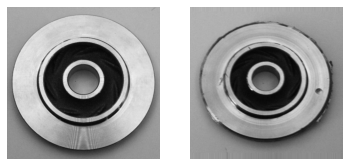

In [29]:
image_1 = plt.imread(ok_dir+random.choice(os.listdir(ok_dir)))
image_2 = plt.imread(def_dir+random.choice(os.listdir(def_dir)))
fig, ax = plt.subplots(1,2)
ax[0].imshow(image_1)
ax[0].axis('off')
ax[1].imshow(image_2)
ax[1].axis('off')

In [41]:
import splitfolders
splitfolders.ratio('/content/data', output="new_data", seed=1337, ratio=(.8, 0.1, 0.1)) 


Copying files: 0 files [00:00, ? files/s]
Copying files: 520 files [00:00, 4674.36 files/s]
Copying files: 1300 files [00:00, 5191.47 files/s]


In [47]:
train_genration = ImageDataGenerator(rescale=1/255,
                                    horizontal_flip=True,
                                    zoom_range=0.2,
                                    shear_range=0.2)
train_data = train_genration.flow_from_directory('/content/new_data/train',
                                                 class_mode='binary',
                                                 batch_size=8,
                                                 target_size=(64,64),
                                                 color_mode='grayscale')

test_genration = ImageDataGenerator(rescale=1/255)
test_data = test_genration.flow_from_directory('/content/new_data/test',
                                        class_mode='binary',
                                        batch_size=8,
                                        target_size=(64,64),
                                        color_mode='grayscale')

Found 1039 images belonging to 2 classes.
Found 132 images belonging to 2 classes.


# Model

In [53]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same',input_shape=(64,64,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
model.add(tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=128,activation='relu')) 
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))                      

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
model.fit_generator(train_data,validation_data=test_data,epochs=10)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
130/130 [==============================] - 10s 71ms/step - loss: 0.6572 - accuracy: 0.6302 - val_loss: 0.5223 - val_accuracy: 0.7652
Epoch 2/10
130/130 [==============================] - 9s 68ms/step - loss: 0.5644 - accuracy: 0.7365 - val_loss: 0.5741 - val_accuracy: 0.7348
Epoch 3/10
130/130 [==============================] - 9s 66ms/step - loss: 0.5257 - accuracy: 0.7451 - val_loss: 0.4984 - val_accuracy: 0.7424
Epoch 4/10
130/130 [==============================] - 9s 67ms/step - loss: 0.5060 - accuracy: 0.7839 - val_loss: 0.5616 - val_accuracy: 0.7500
Epoch 5/10
130/130 [==============================] - 9s 67ms/step - loss: 0.4705 - accuracy: 0.7926 - val_loss: 0.3850 - val_accuracy: 0.8485
Epoch 6/10
130/130 [==============================] - 9s 66ms/step - loss: 0.4490 - accuracy: 0.8098 - val_loss: 0.3573 - val_accuracy: 0.8258
Epoch 7/10
130/130 [==============================] - 9s 68ms/step - loss: 0.4584 - accuracy: 0.7978 - val_loss: 0.3420 - val_accuracy: 0.863

# Prediction

In [71]:
test_image = image.load_img('/content/new_data/test/ok_front/cast_ok_0_199.jpeg',target_size=(64,64),color_mode='grayscale')
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
if result[0]<=0.5:
    print('Defective')
else :
    print('Not Defective')




Not Defective


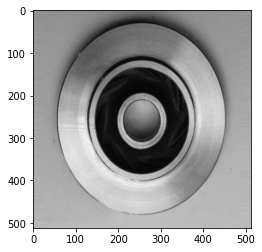

In [80]:
import cv2
import matplotlib.pyplot as plt

# reading image
image = cv2.imread("/content/new_data/test/ok_front/cast_ok_0_199.jpeg")

# displaying image
plt.imshow(image)
cv2.waitKey(0)
plt.show()

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))